<a href="https://colab.research.google.com/github/murigugitonga/math_4_ai/blob/dev/03_calculus/04_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculus — Gradients
  
**Objective:** Understand gradients as vectors of partial derivatives and how they
point in the direction of steepest ascent/descent. Connect directly to ML optimization.

---

> Gradients are the backbone of training machine learning models.  
> They tell us **which direction to move parameters** to minimize loss.


## 1. Intuition

- A **gradient** is a vector of all partial derivatives:

$$
\nabla f(x, y) = \left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right]
$$

- Direction of the gradient → steepest ascent  
- Negative gradient → steepest descent  

Think of a hill:
- You are at a point  
- Gradient points **uphill**  
- Negative gradient points **downhill** → how optimization works


## 2. Mathematical Definition

For a function $f(x, y)$:

$$
\nabla f(x, y) =
\begin{bmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{bmatrix}
$$

- This is a **vector**
- Each component = rate of change along one axis
- Generalizes to $n$ dimensions for ML parameters


In [ ]:
import numpy as np

def numerical_gradient(f, x, y, h= 1e-5):
  df_dx = (f(x + h, y) - f(x , y)) / h
  df_dy = (f(x, y + h) - f(x, y )) / h
  return np.array([df_dx, df_dy])

def f(x,y):
  return x**2 + y**2

x0, y0 = 1.0, 2.0
numerical_gradient(f, x0, y0) # returns gradient vector at (1, 2)

array([2.00001, 4.00001])

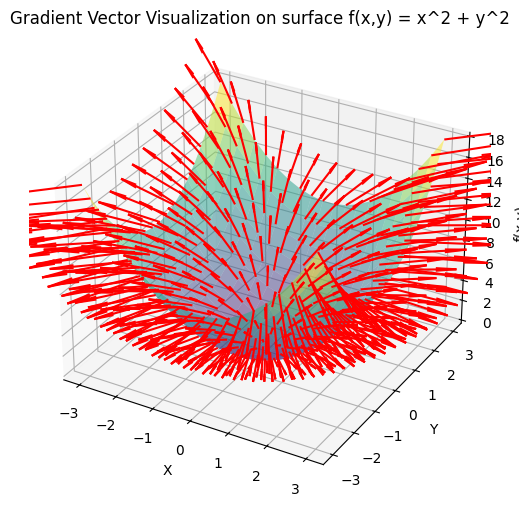

In [ ]:
# visualize gradients on a 3-D surface
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# grid
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# computing gradient vector
U = 2 * X
V = 2 * Y

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# plot gradient arrows
ax.quiver(X, Y, Z, U, V, 0, color='red', length=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x,y)')
ax.set_title('Gradient Vector Visualization on surface f(x,y) = x^2 + y^2')
plt.show()

## 3. Connection to ML

- Each parameter in a model has a partial derivative
- The gradient is all partial derivatives grouped as a vector
- Update rule (gradient descent):

$$
w = w - \eta \nabla L(w)
$$

Where:
- $w$ = parameters  
- $\eta$ = learning rate  
- $\nabla L(w)$ = gradient of the loss


In [ ]:
# parameter loss

def loss(w1, w2, x=1.0, y_true=2.0):
  y_pred = w1*x  + w2*x**2
  return (y_true - y_pred)**2

w1, w2 = 0.5, -0.5
numerical_gradient(loss, w1, w2)

array([-3.99999, -3.99999])

## 4. Key Takeaways

- Gradient = vector of all partial derivatives
- Points in direction of steepest increase
- Negative gradient → direction of steepest decrease
- Gradients are the core of all optimization in AI
- Visualization helps build intuition before coding ML models
